In [ ]:
import pandas as pd
import numpy as np

# Create a date range (e.g., daily for one year)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Generate some random data (e.g., daily temperatures or sales values)
data = np.random.randn(365) * 10 + 20  # Random values with a mean of 20 and standard deviation of 10

# Create a DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Display the first few rows
print(df.head())


                Value
2023-01-01  11.916811
2023-01-02  15.816988
2023-01-03  28.069242
2023-01-04  14.125020
2023-01-05  11.124554


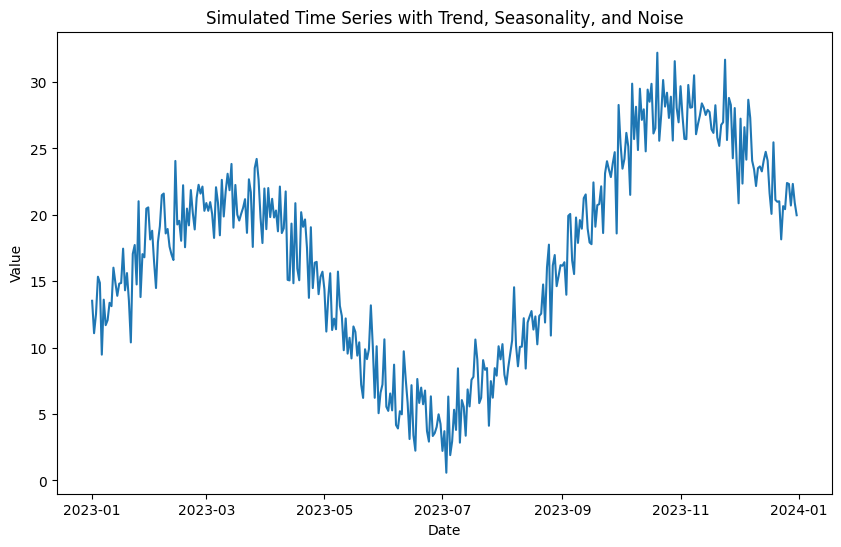

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range
dates = pd.date_range('2023-01-01', periods=365, freq='D')

# Simulate a time series with trend, seasonality, and noise
np.random.seed(0)
trend = np.linspace(10, 20, 365)  # Linear trend
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 365))  # Seasonal pattern
noise = np.random.normal(0, 2, 365)  # Random noise

data = trend + seasonality + noise

# Create the DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Plot the simulated time series
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Simulated Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


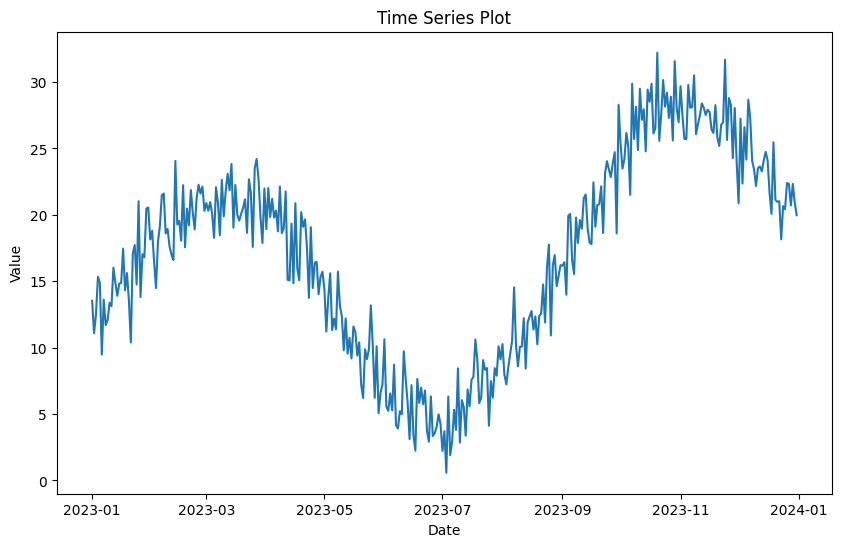

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")


Missing values:
Value    0
dtype: int64


In [ ]:
# Summary statistics
mean_value = df.mean()
std_dev = df.std()
variance = df.var()

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")


Mean: Value    17.091165
dtype: float64
Standard Deviation: Value    7.49877
dtype: float64
Variance: Value    56.231556
dtype: float64


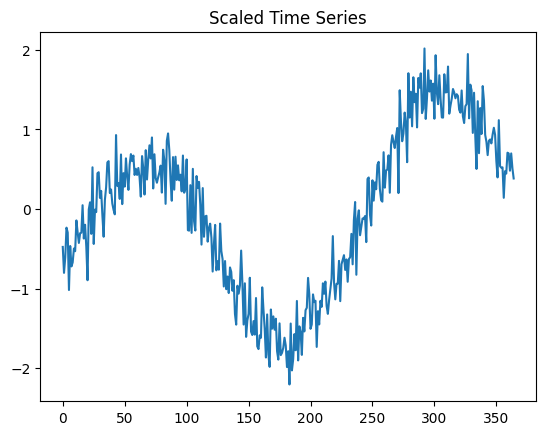

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation if necessary
df_log = np.log(df)

# Apply scaling (StandardScaler for standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Visualize the scaled data
plt.plot(df_scaled)
plt.title('Scaled Time Series')
plt.show()


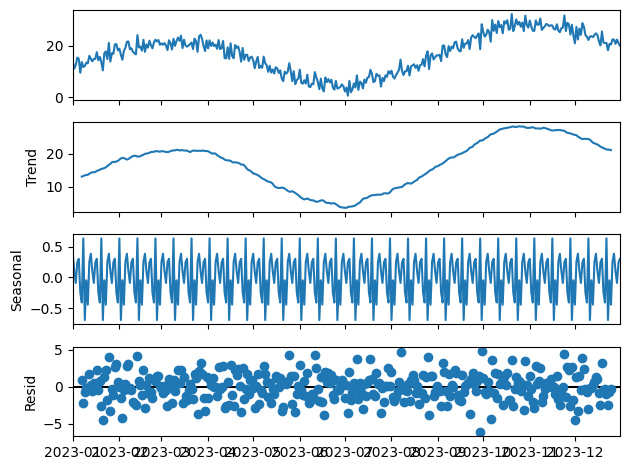

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (additionally pass model='multiplicative' or 'additive')
result = seasonal_decompose(df, model='additive', period=12)  # Assuming monthly data

# Plot decomposition
result.plot()
plt.show()


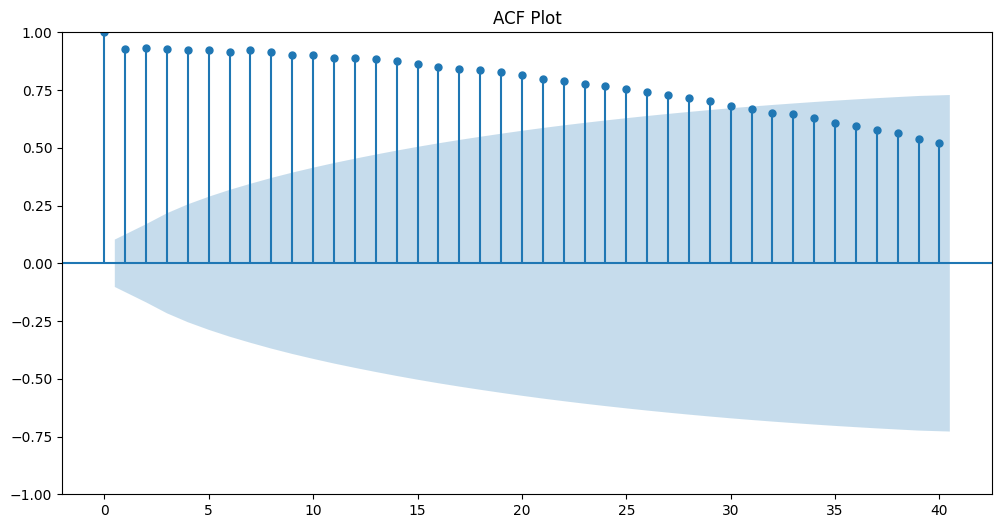

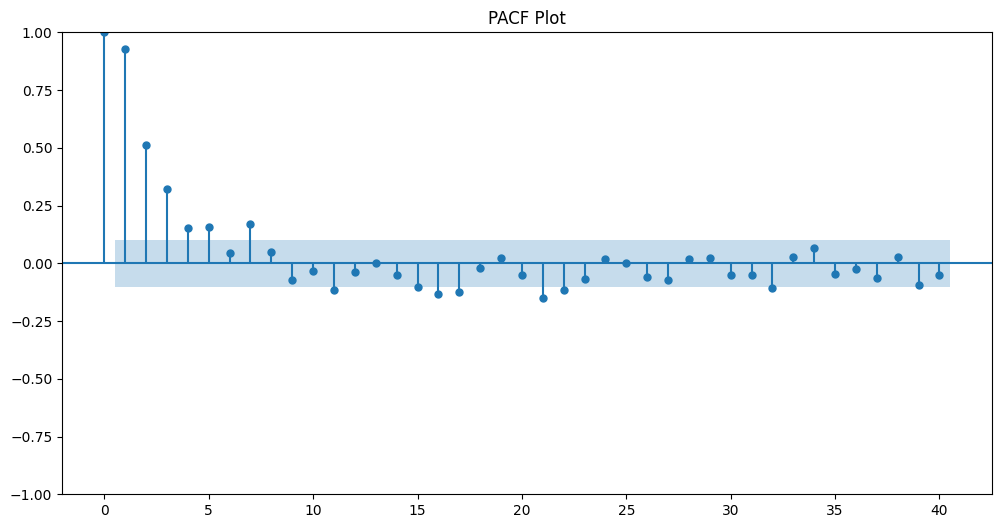

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df, lags=40, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df, lags=40, ax=plt.gca())
plt.title('PACF Plot')
plt.show()


In [ ]:
# Drop missing values
df_cleaned = df.dropna()

# Impute missing values with forward fill or interpolation
df_imputed = df.fillna(method='ffill')  # Forward fill


<ipython-input-9-10ed47494922>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df.fillna(method='ffill')  # Forward fill


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.469401010431409
p-value: 0.5485902909774429


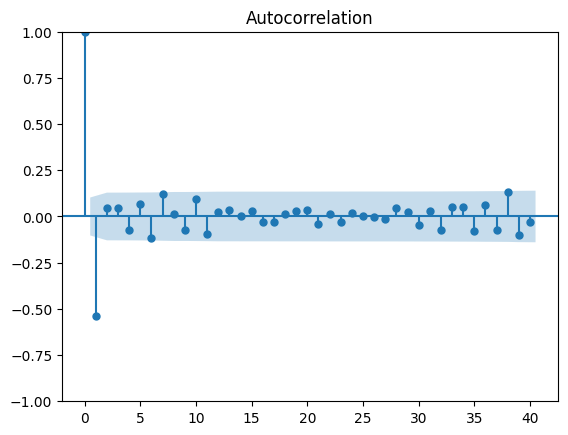

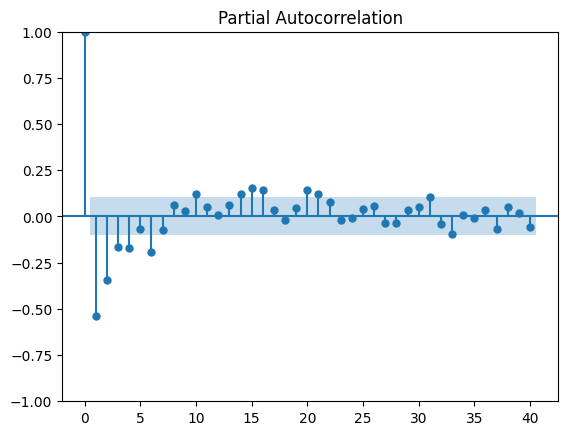

In [ ]:
# Apply differencing to make the series stationary
df_diff = df.diff().dropna()

# Check ACF and PACF again on the differenced series
plot_acf(df_diff, lags=40)
plot_pacf(df_diff, lags=40)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p, d, q values should be based on ACF and PACF analysis)
model = ARIMA(df, order=(2, 1, 1))  # Replace p, d, q with your chosen values
fitted_model = model.fit()

# Summary of the model fit
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  365
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -799.465
Date:                Thu, 05 Dec 2024   AIC                           1606.931
Time:                        08:18:47   BIC                           1622.519
Sample:                    01-01-2023   HQIC                          1613.126
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1938      0.092     -2.097      0.036      -0.375      -0.013
ar.L2         -0.0587      0.080     -0.732      0.464      -0.216       0.099
ma.L1         -0.6417      0.079     -8.168      0.0

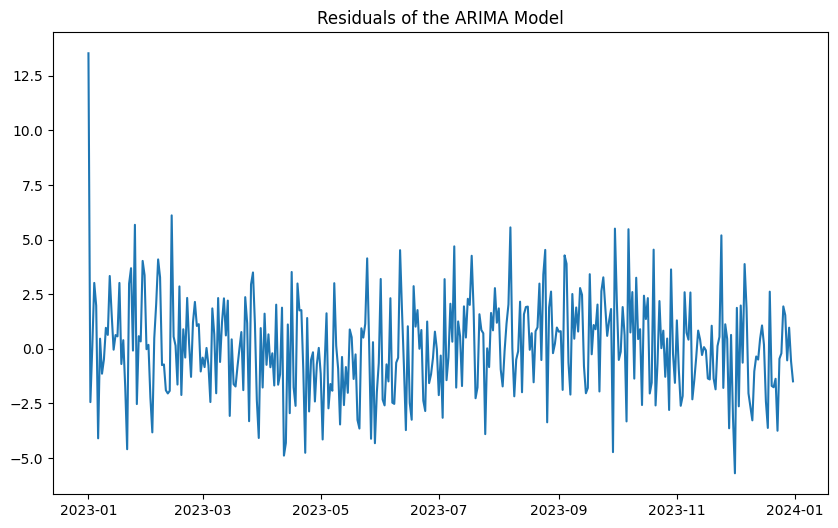

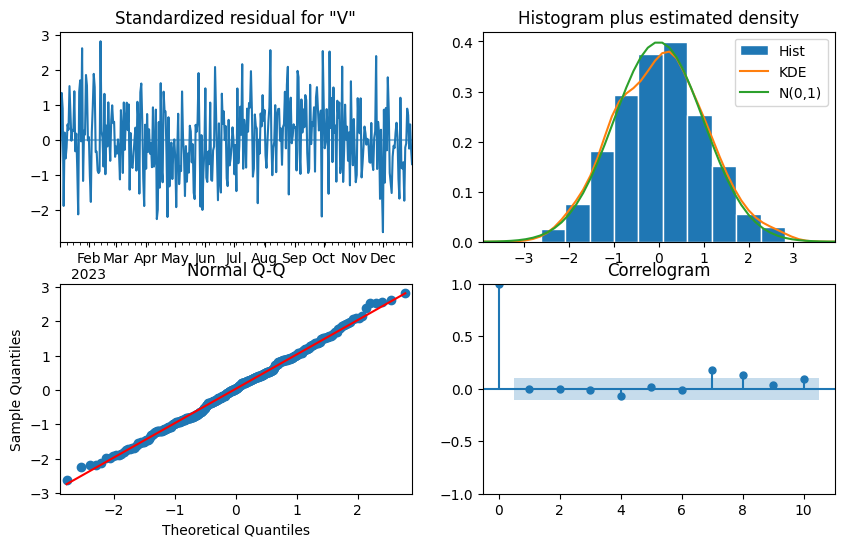

In [ ]:
# Plot residuals to check if they resemble white noise (no patterns)
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

# Perform diagnostic checks on the residuals
fitted_model.plot_diagnostics(figsize=(10, 6))
plt.show()


In [ ]:
# Forecast the next few periods
forecast = fitted_model.forecast(steps=10)  # Forecast 10 steps ahead
print(f"Forecasted values: {forecast}")


Forecasted values: 2024-01-01    21.190775
2024-01-02    21.009326
2024-01-03    20.972707
2024-01-04    20.990460
2024-01-05    20.989170
2024-01-06    20.988378
2024-01-07    20.988607
2024-01-08    20.988609
2024-01-09    20.988595
2024-01-10    20.988598
Freq: D, Name: predicted_mean, dtype: float64
